In [31]:
import contextily as ctx
import matplotlib.pyplot as plt

from spineq.data.census import PopulationDataset
from spineq.data.group import LocalAuthority
from spineq.mappings import lad20nm_to_lad20cd
from spineq.opt.coverage import BinaryCoverage
from spineq.opt.objectives import Column, CombinedObjectives
from spineq.plot.plotting import plot_oa_weights

## Local Authority District to Display

In [3]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

In [4]:
la = LocalAuthority(lad20cd)

## Local Authority Boundary

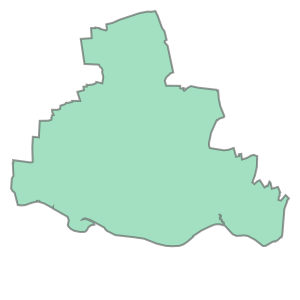

In [7]:
la.la_shape.geometry

## Output Areas Boundaries

(413669.70820000005, 430906.26379999996, 562239.7237, 576823.0023)

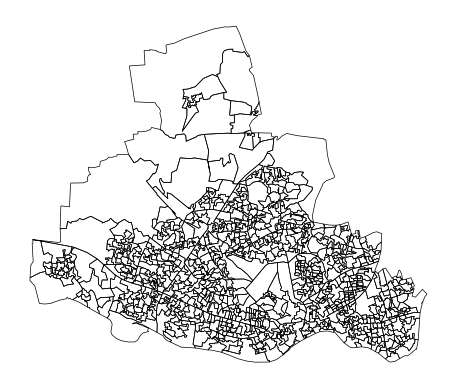

In [14]:
la.oa_shapes.values.plot(facecolor="None", linewidth=0.5)
plt.axis("off")

## Population-Weighted Centroids

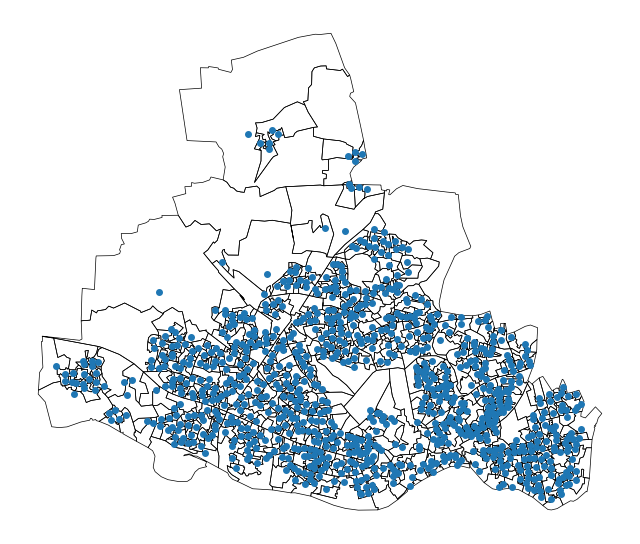

In [36]:
ax = la.oa_shapes.values.plot(
    figsize=(8, 8), facecolor="None", linewidth=0.5, edgecolor="black"
)
ax.set_axis_off()
ax.plot(
    la.oa_centroids.values["x"],
    la.oa_centroids.values["y"],
    linestyle="None",
    marker="o",
    markersize=4,
)

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

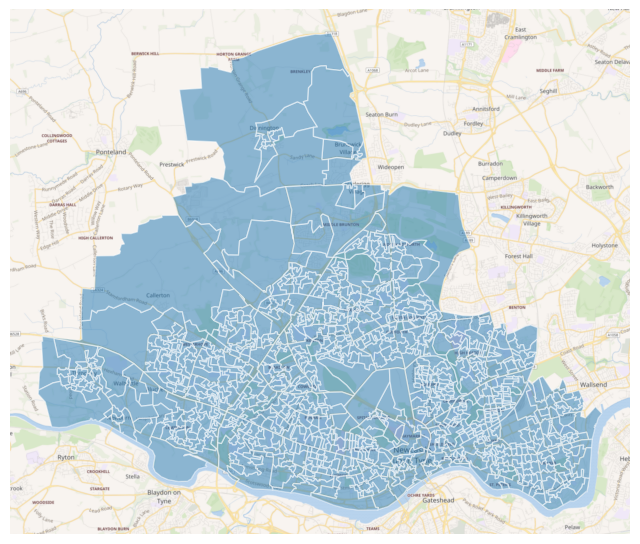

In [37]:
ax = la.oa_shapes.values.plot(figsize=(8, 8), alpha=0.5, edgecolor="white")
ctx.add_basemap(
    ax,
    source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
    crs=la.oa_shapes.values.crs,
)
ax.set_axis_off()

## Population Density

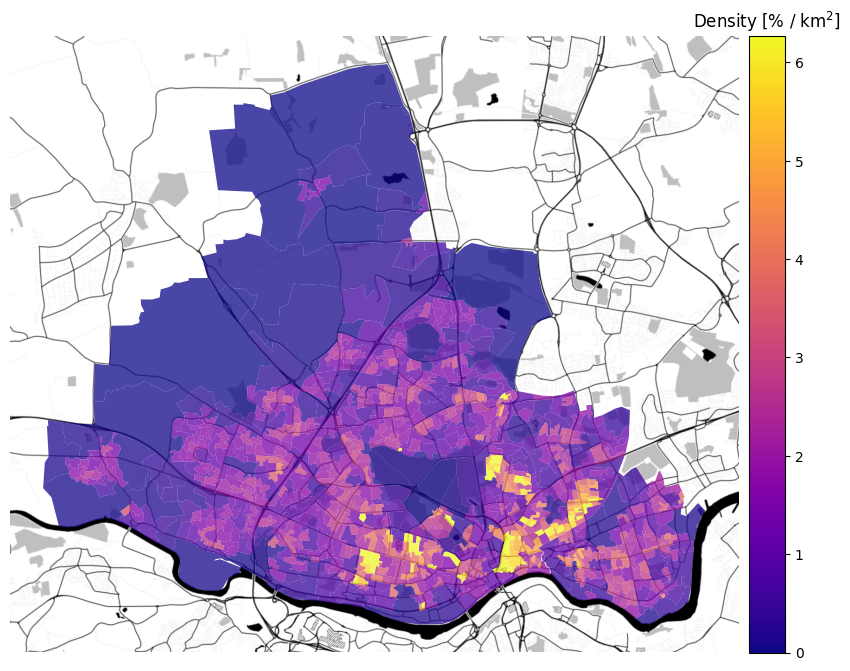

In [33]:
pop = PopulationDataset(lad20cd).to_total()
la.add_dataset(pop)
cov = BinaryCoverage(la.oa_centroids.values["x"], la.oa_centroids.values["y"], 500)
objs = CombinedObjectives(la, [Column(pop.name, "total")], cov)

plot_oa_weights(
    objs,
    density=True,
)